## Ejercicio 4 - Qiskit

In [1]:
from qiskit import IBMQ

provider = IBMQ.load_account()

In [5]:
from qiskit import QuantumCircuit

def hadamards(circuit: QuantumCircuit):

    for q in circuit.qubits:
        circuit.h(q)

### 2 qubits - Constante

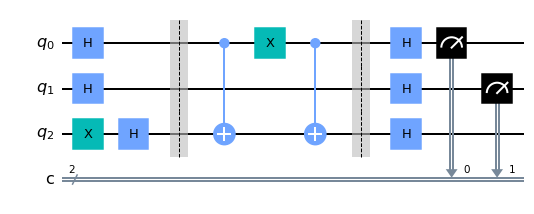

In [3]:
from qiskit import QuantumCircuit

c2c = QuantumCircuit(3, 2)
c2c.x(2)

hadamards(c2c)

c2c.barrier()

# Oráculo
c2c.cnot(0, 2)
c2c.x(0)
c2c.cnot(0, 2)

c2c.barrier()

hadamards(c2c)

c2c.measure([0, 1], [0, 1])

c2c.draw(output='mpl')

In [5]:
from qiskit import transpile

backend = provider.get_backend('ibmq_manila')
transpiled = transpile(c2c, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 13
Job ID: 6241ef01a2f72d76b9dacbe0


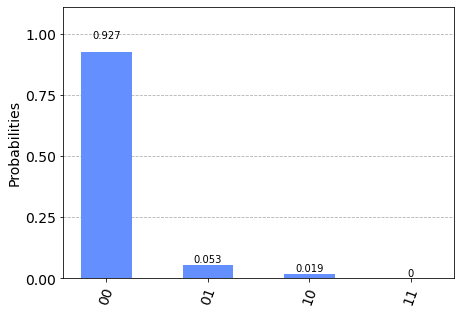

In [30]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_manila')
result = backend.retrieve_job('6241ef01a2f72d76b9dacbe0').result()

plot_histogram(result.get_counts())

Queda bastante claro que el resultado correcto medido es 00, por lo que el circuito ha funcionado correctamente.

### 2 qubits - Balanceada 1

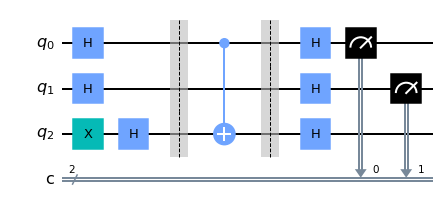

In [31]:
from qiskit import QuantumCircuit

c2b1 = QuantumCircuit(3, 2)
c2b1.x(2)

hadamards(c2b1)

c2b1.barrier()

# Oráculo
c2b1.cnot(0, 2)

c2b1.barrier()

hadamards(c2b1)

c2b1.measure([0, 1], [0, 1])

c2b1.draw(output='mpl')

In [32]:
from qiskit import transpile

backend = provider.get_backend('ibmq_manila')
transpiled = transpile(c2b1, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 11
Job ID: 6241f12719e689374ac82490


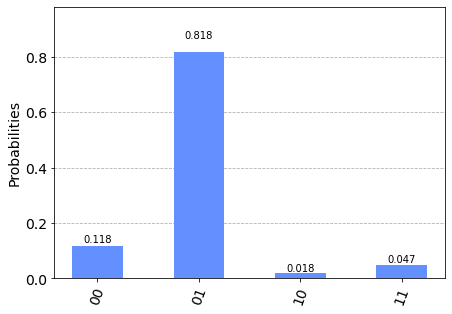

In [34]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_manila')
result = backend.retrieve_job('6241f12719e689374ac82490').result()

plot_histogram(result.get_counts())

Aunque aquí hemos medido 00 unas cuantas veces, esto se debe al ruido, por lo que el resultado es el correto.

### 2 qubits - Balanceada 1

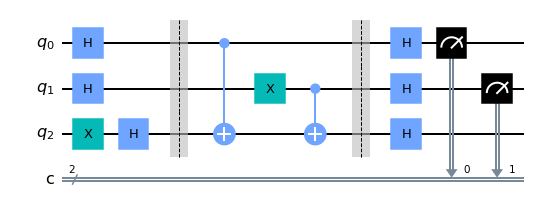

In [36]:
from qiskit import QuantumCircuit

c2b2 = QuantumCircuit(3, 2)
c2b2.x(2)

hadamards(c2b2)

c2b2.barrier()

# Oráculo
c2b2.cnot(0, 2)

c2b2.x(1)
c2b2.cnot(1, 2)

c2b2.barrier()

hadamards(c2b2)

c2b2.measure([0, 1], [0, 1])

c2b2.draw(output='mpl')

In [37]:
from qiskit import transpile

backend = provider.get_backend('ibmq_manila')
transpiled = transpile(c2b2, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 15
Job ID: 6241f2dad97bffbbfd695e02


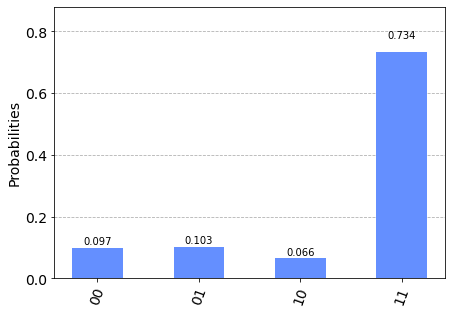

In [38]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_manila')
result = backend.retrieve_job('6241f2dad97bffbbfd695e02').result()

plot_histogram(result.get_counts())

El resultado se aprecia correctamente de nuevo.

Vemos que las profundidades de los circuitos de 2 qubits no han sido muy grandes, por lo que los niveles de ruido han sido bastante bajos, y los resultados se ven perfectamente.

### 3 qubits - constante

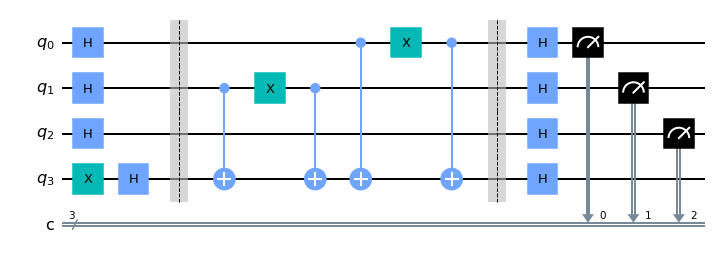

In [42]:
from qiskit import QuantumCircuit

c3c = QuantumCircuit(4, 3)
c3c.x(3)

hadamards(c3c)

c3c.barrier()

# Oráculo
c3c.cnot(1, 3)
c3c.x(1)
c3c.cnot(1, 3)

c3c.cnot(0, 3)
c3c.x(0)
c3c.cnot(0, 3)

c3c.barrier()

hadamards(c3c)

c3c.measure([0, 1, 2], [0, 1, 2])

c3c.draw(output='mpl')

In [43]:
from qiskit import transpile

backend = provider.get_backend('ibmq_manila')
transpiled = transpile(c3c, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 19
Job ID: 6241f48209995c9f7149403d


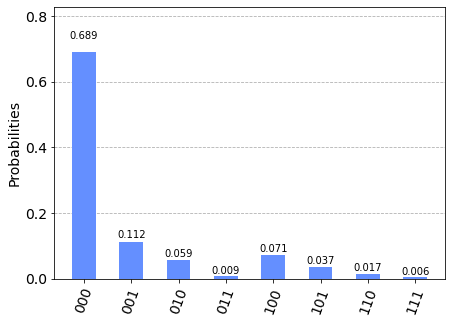

In [44]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_manila')
result = backend.retrieve_job('6241f48209995c9f7149403d').result()

plot_histogram(result.get_counts())

Se ve muy bien que el resultado correcto es ***000***, por lo que el circuito ha funcionado correctamente.

### 3 qubits - Balanceada 1

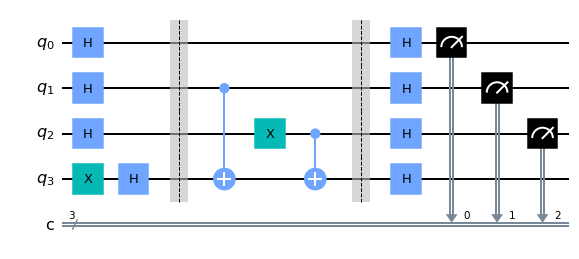

In [8]:
from qiskit import QuantumCircuit

c3b1 = QuantumCircuit(4, 3)
c3b1.x(3)

hadamards(c3b1)

c3b1.barrier()

# Oráculo
c3b1.cnot(1, 3)

c3b1.x(2)
c3b1.cnot(2, 3)

c3b1.barrier()

hadamards(c3b1)

c3b1.measure([0, 1, 2], [0, 1, 2])

c3b1.draw(output='mpl')

In [9]:
from qiskit import transpile

backend = provider.get_backend('ibmq_manila')
transpiled = transpile(c3b1, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 13
Job ID: 624b06418eeb1409e9d7196e


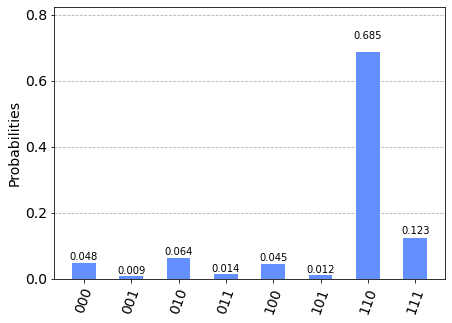

In [3]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_manila')
result = backend.retrieve_job('624b06418eeb1409e9d7196e').result()

plot_histogram(result.get_counts())

Claramente, el resultado medido en ausencia de ruido es siempre ***110***, por lo que ha funcionado correctamente al tratarse de una función balanceada.

### 3 qubits - Balanceada 2

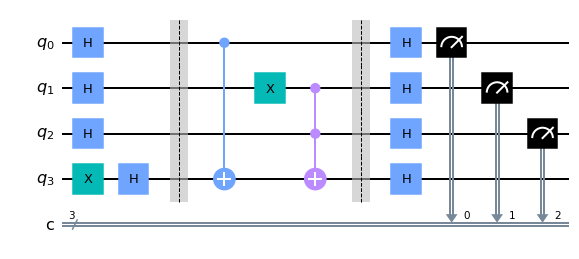

In [6]:
from qiskit import QuantumCircuit

c3b2 = QuantumCircuit(4, 3)
c3b2.x(3)

hadamards(c3b2)

c3b2.barrier()

c3b2.cnot(0, 3)

# Oráculo

c3b2.x(1)
c3b2.toffoli(1, 2, 3)

c3b2.barrier()

hadamards(c3b2)

c3b2.measure([0, 1, 2], [0, 1, 2])

c3b2.draw(output='mpl')

In [17]:
from qiskit import transpile

backend = provider.get_backend('ibmq_lima')
transpiled = transpile(c3b2, backend=backend)

print('Profundidad del circuito transpilado:', transpiled.depth())

job = backend.run(transpiled)
print('Job ID:', job.job_id())

Profundidad del circuito transpilado: 27
Job ID: 624bf57c8eeb14d855d71ea1


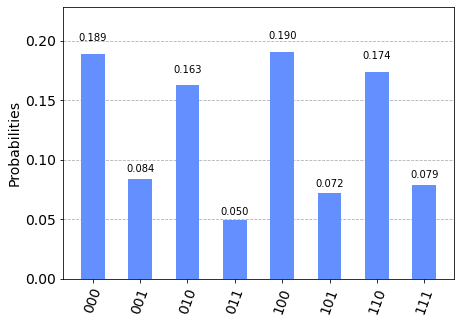

In [16]:
from qiskit.visualization import plot_histogram

backend = provider.get_backend('ibmq_lima')
result = backend.retrieve_job('624bf57c8eeb14d855d71ea1').result()

plot_histogram(result.get_counts())

El `ibmb_manila` estaba dando tiempos de respuesta muy altos, por lo que aquí cambié al `ibmq_lima`, que solo tiene 5 qubits. Sin embargo, parece que la profunidad del circuito es demasiado grande para un backend de 5 qubits, por lo que el ruido hace imposible ver si la función es constante o balanceada.